In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import TimeSeriesSplit

import read_data as rd
from metrics import cwcf, picpf, pinewf
from predict_fx import XXXmodel as xm

In [2]:
ts_sm, ts_tr, ts_pe = rd.load_sp()

In [3]:
def split_to_XyTT(ts):
    ts_u_train, ts_u_test, ts_l_train, ts_l_test, ts_train, ts_test = rd.split_train_test(ts)
    X_train, y_train = rd.split_to_Xy(ts_train, ts_u_train, ts_l_train)
    X_test, y_test = rd.split_to_Xy(ts_test, ts_u_test, ts_l_test)
    return  X_train, y_train, X_test, y_test

In [28]:
def plt_xxx_model(model, save=False):
    plt.figure(figsize=(15,4))
    X_train, y_train, X_test, y_test = split_to_XyTT(ts_sm)
    xx = xm(model)
    xx.fit(X_train, y_train)
    p = xx.predict(X_test)
    pu, pl, t = p[:,0], p[:,1], y_test[:,2]
    plt.subplot(131)
    plt.title('sm.1')
    l1, = plt.plot(pu, color='blue', marker='o', linestyle='--')
    l2, = plt.plot(pl, color='blue', marker='o', linestyle=':')
    l3, = plt.plot(t, color='gray', marker='x')
    plt.legend(handles=[l1,l2,l3], labels=['up', 'low', 'true-value'], loc='upper right')
#     print(xx.mscore())

    X_train, y_train, X_test, y_test = split_to_XyTT(ts_tr)
    xx = xm(model)
    xx.fit(X_train, y_train)
    p = xx.predict(X_test)
    pu, pl, t = p[:,0], p[:,1], y_test[:,2]
    plt.subplot(132)
    plt.title('tr.1')
    l1, = plt.plot(pu, color='blue', marker='o', linestyle='--')
    l2, = plt.plot(pl, color='blue', marker='o', linestyle=':')
    l3, = plt.plot(t,color='gray', marker='x')
    plt.legend(handles=[l1,l2,l3], labels=['up', 'low', 'true-value'], loc='upper right')
#     print(xx.mscore())

    X_train, y_train, X_test, y_test = split_to_XyTT(ts_pe)
    xx = xm(model)
    xx.fit(X_train, y_train)
    p = xx.predict(X_test)
    pu, pl, t = p[:,0], p[:,1], y_test[:,2]
    plt.subplot(133)
    plt.title('pe.1')
    l1, = plt.plot(pu, color='blue', marker='o', linestyle='--')
    l2, = plt.plot(pl, color='blue', marker='o', linestyle=':')
    l3, = plt.plot(t,color='gray', marker='x')
    plt.legend(handles=[l1,l2,l3], labels=['up', 'low', 'true-value'], loc='upper right')
    if save:
        plt.savefig('./fig/3-10_' + model, dpi=600)
#     print(xx.mscore())

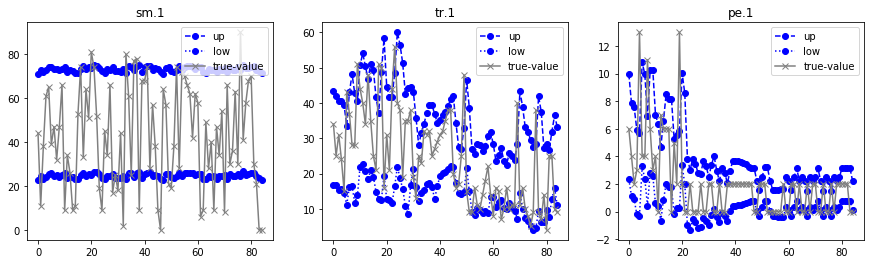

In [29]:
plt_xxx_model('bayesian', save=True)

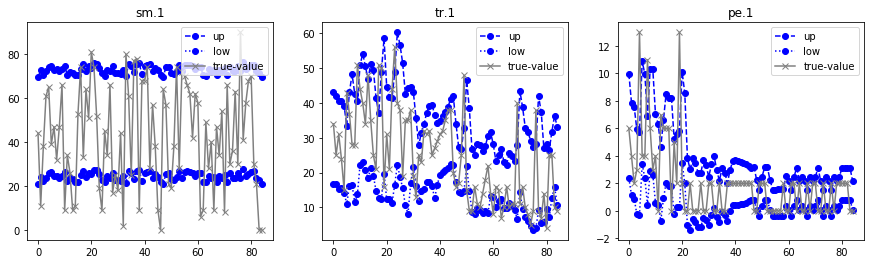

In [30]:
plt_xxx_model('linear', save=True)

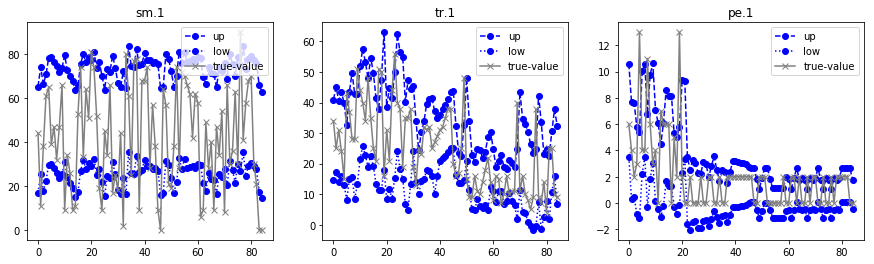

In [31]:
plt_xxx_model('svm', save=True)

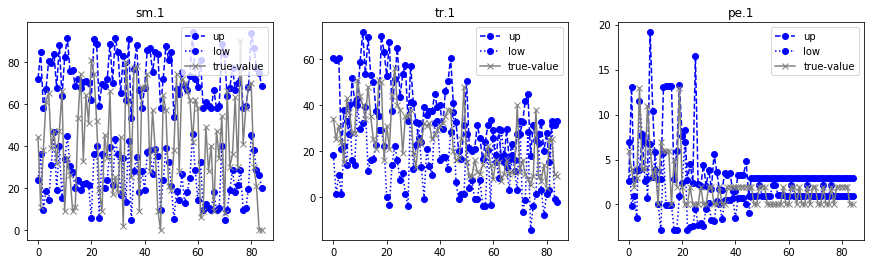

In [32]:
plt_xxx_model('cart', save=True)

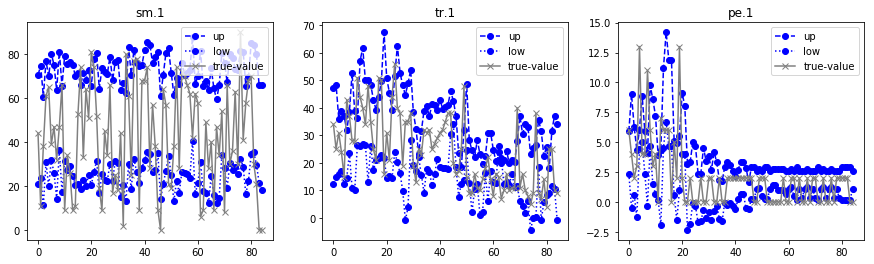

In [33]:
plt_xxx_model('rfr', save=True)